In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
from plotly.graph_objs import *
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

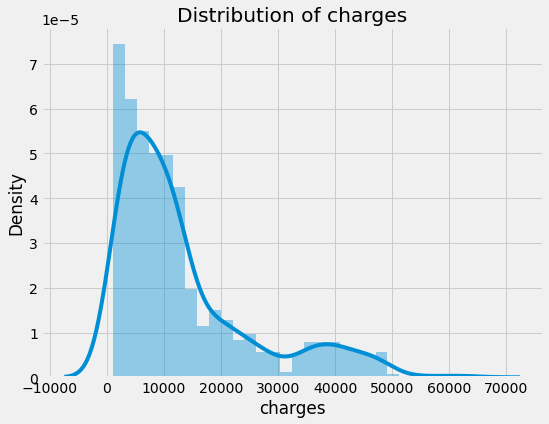

In [5]:
plt.figure(figsize=(8,6))
sns.distplot(df['charges'], kde = True)
plt.title('Distribution of charges')
plt.show()

In [6]:
px.scatter(x = 'age', y='charges', data_frame = df, color = 'age')

In [7]:
age_18_25 = df.age[(df.age >= 18)& (df.age <=25)]
age_26_35 = df.age[(df.age >= 26)& (df.age <=35)]
age_36_45 = df.age[(df.age >= 36)& (df.age <=45)]
age_46_55 = df.age[(df.age >= 46)& (df.age <=55)]
age_55 = df.age[df.age >= 55]

In [8]:
x = ['18-25', '25-36', '36-45', '45-55', '55+']
y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
    len(age_55.values)]
px.bar(data_frame = df, x = x, y = y, color = x, title='Number of patient per age group')

In [9]:
px.histogram(data_frame = df, x = 'charges', color='sex', marginal='box')

In [10]:
px.box(x = 'sex', y = 'charges', data_frame = df)

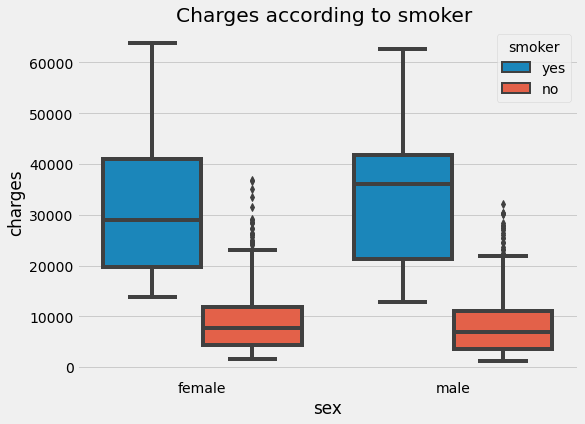

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'sex', y='charges', hue = 'smoker', data = df)
plt.title('Charges according to smoker ')
plt.show()

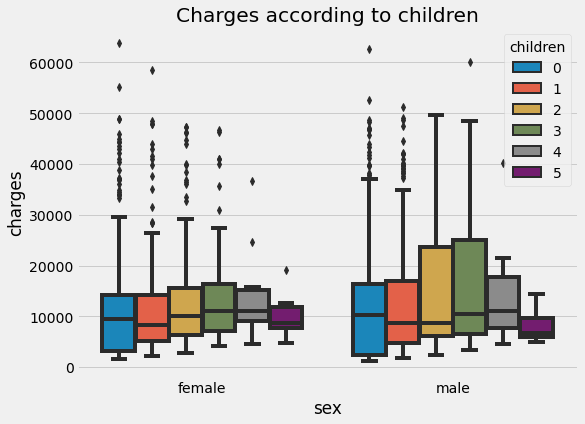

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'sex', y='charges', hue = 'children', data = df)
plt.title('Charges according to children')
plt.show()

<Figure size 576x432 with 0 Axes>

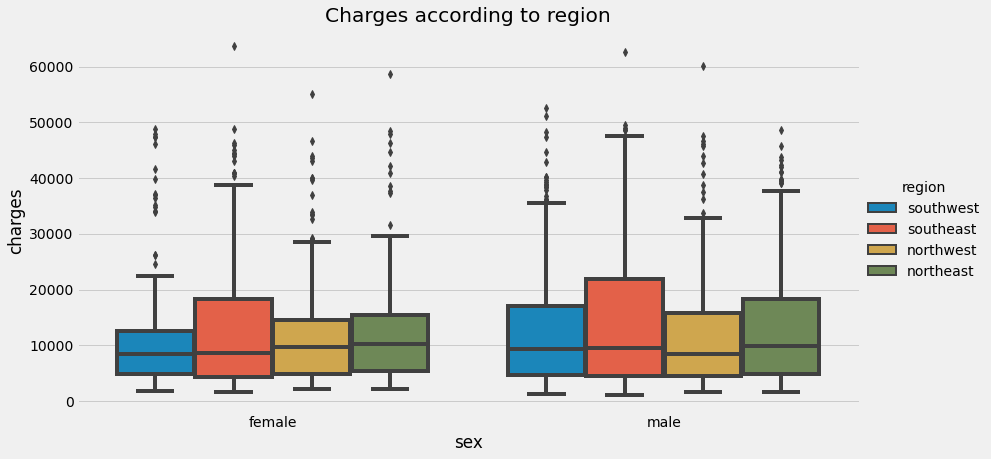

In [13]:
plt.figure(figsize=(8,6))
sns.catplot(x = 'sex', y='charges', hue = 'region', data = df,kind = 'box', height = 6, 
            aspect = 2)
plt.title('Charges according to region')
plt.show()

In [14]:
px.scatter(x = 'bmi', y = 'charges', color = 'bmi', data_frame = df, template = 'plotly_dark')

In [15]:
px.scatter(x = 'bmi', y = 'charges', color = 'sex', data_frame = df, template = 'ggplot2')

In [16]:
px.scatter(x = 'bmi', y = 'charges', color = 'smoker', data_frame = df ,template = 'xgridoff')

In [17]:
px.scatter(x = 'bmi', y = 'charges', color = 'children', data_frame = df, 
           template = 'gridon', size = 'children')

In [18]:
df_child = df.groupby(df['children'])['charges'].mean().reset_index()
df_child

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [19]:
px.bar(data_frame = df_child, x = 'children', y = 'charges', color = 'charges', 
       template = 'ygridoff')

In [20]:
px.histogram(data_frame = df, x = 'charges', color = 'children', marginal = 'box', nbins = 100)

<Figure size 576x432 with 0 Axes>

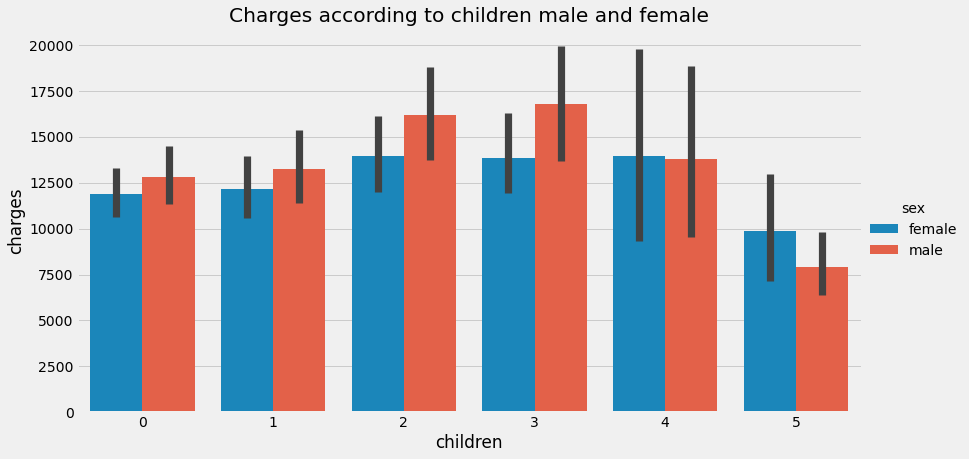

In [21]:
plt.figure(figsize=(8,6))
sns.catplot(x = 'children', y='charges', hue = 'sex', data = df,kind = 'bar', height = 6, 
            aspect = 2)
plt.title('Charges according to children male and female')
plt.show()

In [22]:
px.box(x = 'children', y = 'bmi', data_frame = df, template = 'gridon')

In [23]:
px.box(x = 'children', y = 'charges', color = 'smoker', data_frame = df, template = 'seaborn')

In [24]:
px.box(x = 'children', y = 'charges', color = 'region', data_frame = df, template = 'ggplot2')

In [25]:
px.box(x = 'smoker', y = 'charges', data_frame = df, template = 'plotly_dark')

In [26]:
px.histogram(x = 'charges', data_frame = df, nbins = 100, color = 'smoker', marginal = 'box')

In [27]:
px.box(x = 'smoker', y = 'charges', color = 'sex', data_frame = df, template = 'gridon')

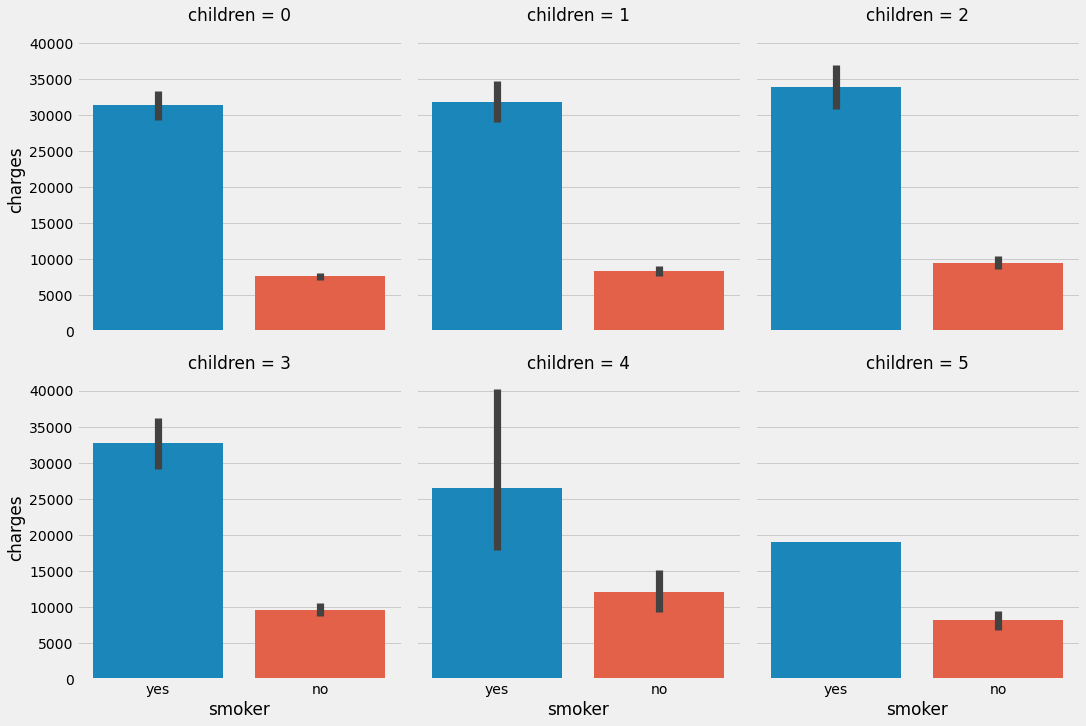

In [28]:
sns.catplot(x = 'smoker', y = 'charges', col = 'children', data = df, kind = 'bar',
           col_wrap = 3)
plt.show()

In [29]:
px.box(x = 'smoker', y = 'charges', color = 'region', data_frame = df)

In [30]:
px.histogram(data_frame = df, x = 'charges', color = 'region', nbins = 100, marginal = 'box')

In [31]:
px.box(data_frame = df, x = 'region', y = 'charges',color = 'region', template = 'seaborn')

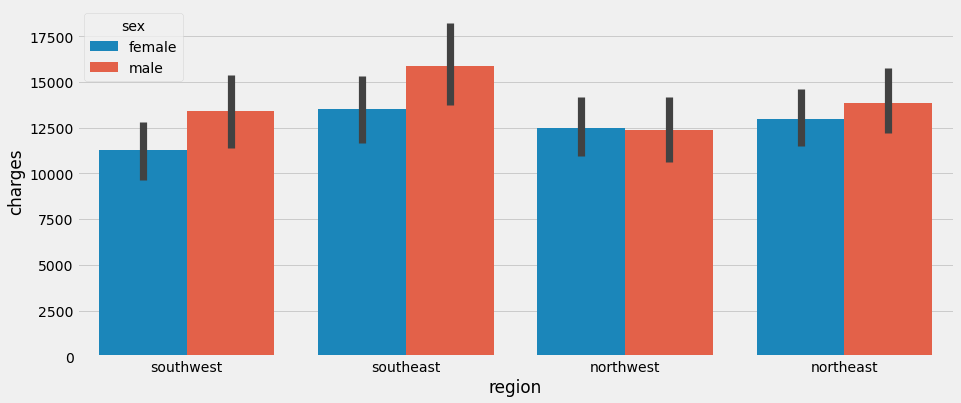

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df)
plt.show()

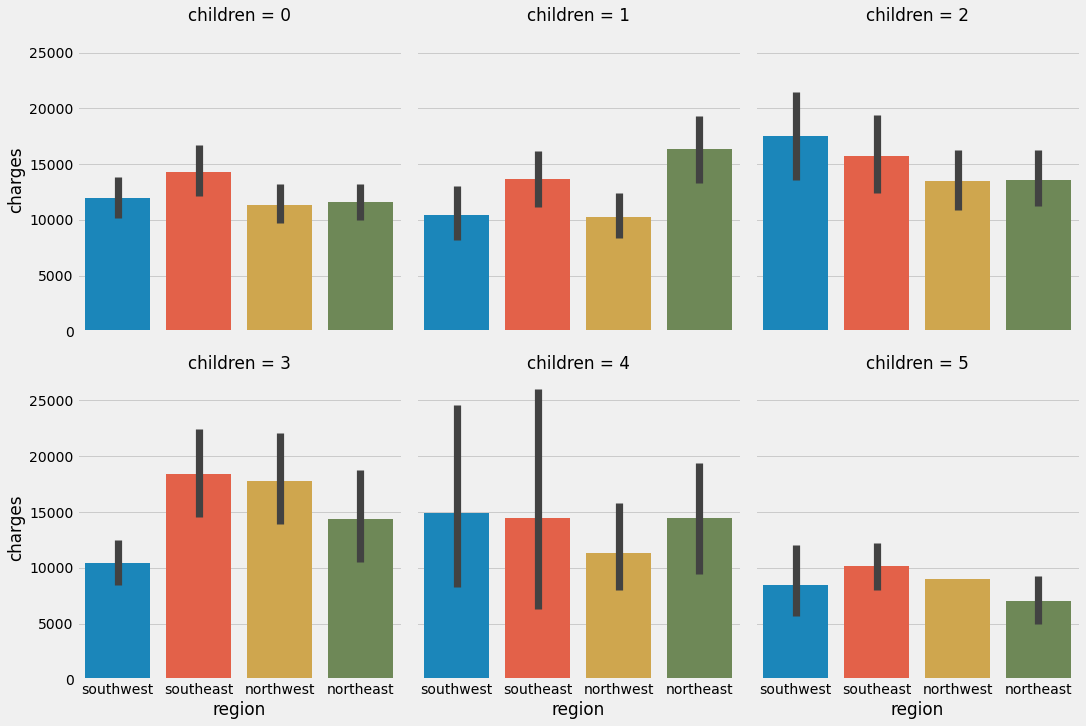

In [33]:
sns.catplot(x = 'region', y = 'charges', col = 'children', data = df, kind = 'bar', col_wrap = 3)
plt.show()

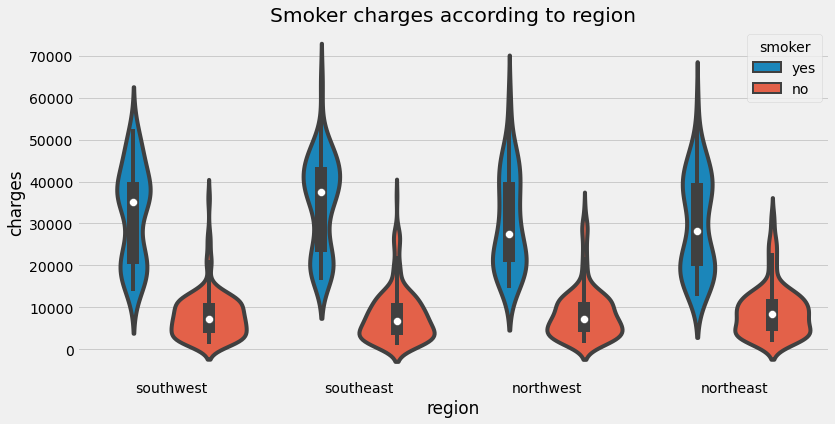

In [34]:
plt.figure(figsize = (12,6))
sns.violinplot(x = 'region', y = 'charges', hue = 'smoker', data = df)
plt.title('Smoker charges according to region')
plt.show()

<AxesSubplot:>

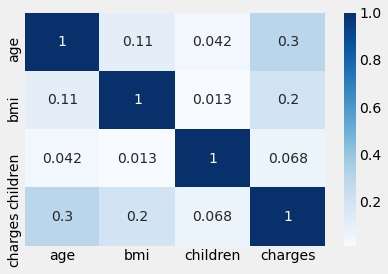

In [35]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

# Data Preprocessing

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                            (OneHotEncoder(handle_unknown = 'ignore'),
                            ['sex','smoker','region']))

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

In [41]:
# compiling our model

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics = ['mae'])

In [42]:
# fit out model
model_history = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 1ms/step - loss: 9283.9062 - mae: 9283.9062
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 4198.9746 - mae: 4198.9746
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 3456.9749 - mae: 3456.9749
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 3286.6941 - mae: 3286.6941
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 3220.7444 - mae: 3220.7444
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 2947.6968 - mae: 2947.6968
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 2813.7817 - mae: 2813.7817
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 2592.6321 - mae: 2592.6321
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 2433.5691 - mae: 2433.5691
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 2331.6538 - mae: 2331.6538

34/34 [==============================] - 0s 1ms/step - loss: 1645.7388 - mae: 1645.7388
Epoch 163/500
34/34 [==============================] - 0s 1ms/step - loss: 1667.6017 - mae: 1667.6017
Epoch 164/500
34/34 [==============================] - 0s 1ms/step - loss: 1764.0929 - mae: 1764.0929
Epoch 165/500
34/34 [==============================] - 0s 1ms/step - loss: 1649.3997 - mae: 1649.3997
Epoch 166/500
34/34 [==============================] - 0s 2ms/step - loss: 1736.5017 - mae: 1736.5017
Epoch 167/500
34/34 [==============================] - 0s 1ms/step - loss: 1746.2952 - mae: 1746.2952
Epoch 168/500
34/34 [==============================] - 0s 1ms/step - loss: 1769.9226 - mae: 1769.9226
Epoch 169/500
34/34 [==============================] - 0s 1ms/step - loss: 1650.5697 - mae: 1650.5697
Epoch 170/500
34/34 [==============================] - 0s 1ms/step - loss: 1672.0533 - mae: 1672.0533
Epoch 171/500
34/34 [==============================] - 0s 1ms/step - loss: 1685.8933 - mae: 1685

34/34 [==============================] - 0s 2ms/step - loss: 1450.4171 - mae: 1450.4171
Epoch 323/500
34/34 [==============================] - 0s 1ms/step - loss: 1511.7745 - mae: 1511.7745
Epoch 324/500
34/34 [==============================] - 0s 1ms/step - loss: 1494.2465 - mae: 1494.2465
Epoch 325/500
34/34 [==============================] - 0s 1ms/step - loss: 1506.9276 - mae: 1506.9276
Epoch 326/500
34/34 [==============================] - 0s 1ms/step - loss: 1456.0703 - mae: 1456.0703
Epoch 327/500
34/34 [==============================] - 0s 2ms/step - loss: 1450.0148 - mae: 1450.0148
Epoch 328/500
34/34 [==============================] - 0s 2ms/step - loss: 1488.2214 - mae: 1488.2214
Epoch 329/500
34/34 [==============================] - 0s 1ms/step - loss: 1460.3921 - mae: 1460.3921
Epoch 330/500
34/34 [==============================] - 0s 2ms/step - loss: 1431.2798 - mae: 1431.2798
Epoch 331/500
34/34 [==============================] - 0s 2ms/step - loss: 1385.9041 - mae: 1385

34/34 [==============================] - 0s 2ms/step - loss: 1413.9253 - mae: 1413.9253
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 1447.0706 - mae: 1447.0706
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 1419.1292 - mae: 1419.1292
Epoch 405/500
34/34 [==============================] - 0s 2ms/step - loss: 1518.0491 - mae: 1518.0491
Epoch 406/500
34/34 [==============================] - 0s 2ms/step - loss: 1401.4087 - mae: 1401.4087
Epoch 407/500
34/34 [==============================] - 0s 1ms/step - loss: 1379.6230 - mae: 1379.6230
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 1403.0729 - mae: 1403.0729
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 1371.5262 - mae: 1371.5262
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 1391.8850 - mae: 1391.8850
Epoch 411/500
34/34 [==============================] - 0s 2ms/step - loss: 1454.4875 - mae: 1454

In [43]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1888.9567 - mae: 1888.9567


[1888.9566650390625, 1888.9566650390625]

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 76,921
Trainable params: 76,921
Non-trainable params: 0
____________________________________________________